In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, BatchNormalization

In [6]:
# LOADING THE MNIST DATASET
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
print(f"X-Train Shape: {x_train.shape}\nY-Train Shape: {y_train.shape}")
print(f"X-Test Shape: {x_test.shape}\nY-Test Shape: {y_test.shape}")

X-Train Shape: (60000, 28, 28)
Y-Train Shape: (60000,)
X-Test Shape: (10000, 28, 28)
Y-Test Shape: (10000,)


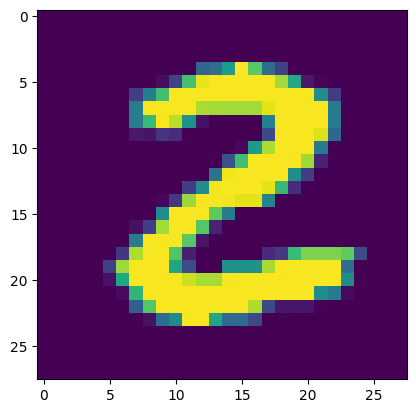

In [8]:
plt.imshow(x_train[25])

In [18]:
# Normalisation of data : Range of values reduced from [0,255] to [0,1]
x_train = x_train/255
x_test = x_test/255

In [34]:
# A Neural Network with output layer having softmax activation for multiclass classification
model = Sequential(
    [
        Flatten(input_shape = (28, 28)),
        Dense(512, activation = 'relu'),
        BatchNormalization(),
        Dense(512, activation = 'relu'),
        BatchNormalization(),
        Dense(10, activation = 'linear')
    ]
)

In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,802 (2.57 MB)

 Trainable params: 671,754 (2.56 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [36]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer = "Adam", metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8980 - loss: 0.3346 - val_accuracy: 0.9474 - val_loss: 0.1666
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9603 - loss: 0.1289 - val_accuracy: 0.9634 - val_loss: 0.1207
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9698 - loss: 0.0956 - val_accuracy: 0.9663 - val_loss: 0.1258
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9728 - loss: 0.0844 - val_accuracy: 0.9718 - val_loss: 0.0995
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9780 - loss: 0.0705 - val_accuracy: 0.9690 - val_loss: 0.1092
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9795 - loss: 0.0666 - val_accuracy: 0.9680 - val_loss: 0.1142
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9807 - loss: 0.0605 - val_accuracy: 0.9756 - val_loss: 0.0837
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9826 - loss: 0.051

In [39]:
model.save("model.keras")

In [37]:
# Predict probabilites
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)  # the class with max probability will be the prediction
loss_and_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss_and_acc[0]}\nTest Accuracy: {loss_and_acc[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.1310
Test Loss: 0.10185015201568604
Test Accuracy: 0.9811999797821045


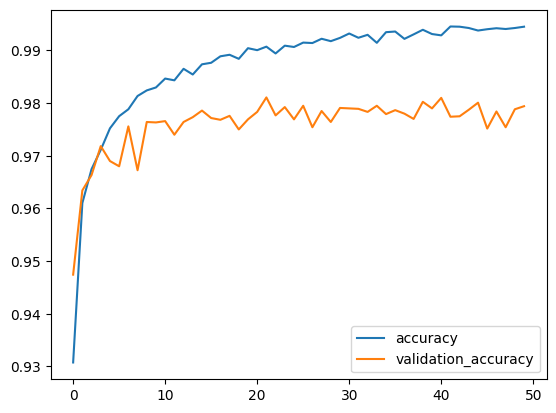

In [38]:
ax = plt.axes()
ax.plot(history.history['accuracy'], label = "accuracy")
ax.plot(history.history['val_accuracy'], label = "validation_accuracy")
ax.legend()

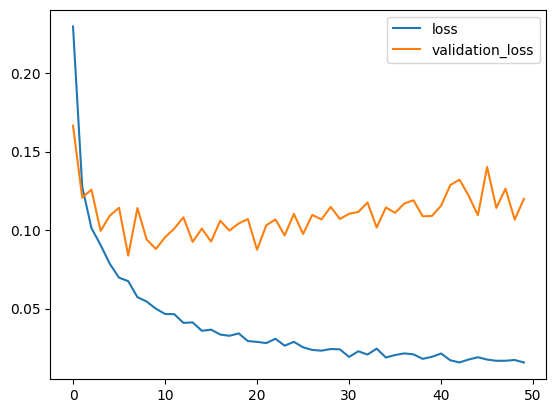

In [40]:
ax = plt.axes()
ax.plot(history.history['loss'], label = "loss")
ax.plot(history.history['val_loss'], label = "validation_loss")
ax.legend()